# Looking at TVB Connectivity192

Setup

In [1]:
tvb_folder = '/home/hpc3230/Code/libraries_of_others/github'

In [2]:
# Generic imports

import numpy as np

# Visualization stuff

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


# TVB stuff

nbso,nbse = sys.stdout,sys.stderr # hack part 1/2 to keep output printing properly
sys.path.append(tvb_folder +'/tvb-library')
sys.path.append(tvb_folder + '/tvb-data')
from tvb.simulator.lab import *
sys.stdout,sys.stderr = nbso,nbse  # ...hack part 2/2
#from tvb.simulator.plot.tools import plot_surface_mpl,plot_surface_mpl_mv
  
 

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Load it in

In [ ]:
conn_192 = connectivity.Connectivity.from_file('connectivity_192.zip')

How many cortical vs. subcortical nodes?

In [129]:
cortical_nodes = np.nonzero(conn_192.cortical==True)[0]

subcortical_nodes = np.nonzero(conn_192.cortical==False)[0]

In [130]:
len(cortical_nodes)

76

In [131]:
len(subcortical_nodes)

116

List the names of the subcortical nodes

In [133]:
conn_192.region_labels[subcortical_nodes]

array(['lAD', 'lAM', 'lAN', 'lAV', 'lCAUD', 'lCdc', 'lCIF', 'lCIM', 'lCL',
       'lCLAU', 'lCLC', 'lCLD', 'lCN.MD', 'lCS', 'lCSL', 'lGL', 'lGM',
       'lGMPC', 'lIL', 'lLD', 'lLI', 'lLP', 'lMD', 'lMDDC', 'lMDMC',
       'lMDMF', 'lMDpc', 'lML', 'lPA', 'lPAC', 'lPcn', 'lPf', 'lPT',
       'lPUL', 'lPUL.I', 'lPUL.L', 'lPUL.M', 'lPUL.O', 'lR', 'lRE', 'lSG',
       'lTeg.a', 'lVA', 'lVAMC', 'lVApc', 'lVL', 'lVLC', 'lVLM', 'lVLo',
       'lVLPS', 'lVP', 'lVPI', 'lVPL', 'lVPLc', 'lVPLO', 'lVPM', 'lVPMPC',
       'lX', 'rAD', 'rAM', 'rAN', 'rAV', 'rCAUD', 'rCdc', 'rCIF', 'rCIM',
       'rCL', 'rCLAU', 'rCLC', 'rCLD', 'rCN.MD', 'rCS', 'rCSL', 'rGL',
       'rGM', 'rGMPC', 'rIL', 'rLD', 'rLI', 'rLP', 'rMD', 'rMDDC', 'rMDMC',
       'rMDMF', 'rMDpc', 'rML', 'rPA', 'rPAC', 'rPcn', 'rPf', 'rPT',
       'rPUL', 'rPUL.I', 'rPUL.L', 'rPUL.M', 'rPUL.O', 'rR', 'rRE', 'rSG',
       'rTeg.a', 'rVA', 'rVAMC', 'rVApc', 'rVL', 'rVLC', 'rVLM', 'rVLo',
       'rVLPS', 'rVP', 'rVPI', 'rVPL', 'rVPLc', 'rVPLO'

I think these can probably be figure out by matching to the second half of [table in Spiegler et al. 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5052665/table/T1/):

*Table 1:
Abbreviations of brain areas  
A1	Primary auditory cortex (57,74)	 
A2	Secondary auditory cortex (33,64)	  
Amyg	Amygdala (151,135)	
CCa	Gyrus cinguli anterior (54,49)	  
CCp	Gyrus cinguli posterior (167,179)	  
CCr	Gyrus cinguli retrosplenialis (68,67)	  
CCs	Gyrus cinguli subgenualis (29,42)	  
FEF	Frontal eye field (104,161)	  
G	Gustatory cortex (52,42)	  
HC	Hippocampal cortex (75,54)	  
Ia	Anterior insula (48,71)	  
Ip	Posterior insula (82,111)	  
M1	Primary motor area (463,460)	  
PCi	Inferior parietal cortex (454,371)	  
PCip	Cortex of the intraparietal sulcus (355,486)	  
PCm	Medial parietal cortex (196,241)	  
PCs	Superior parietal cortex (199,177)	  
PFCcl	Centrolateral prefrontal cortex (328,227)	  
PFCdl	Dorsolateral prefrontal cortex (248,216)	  
PFCdm	Dorsomedial prefrontal cortex (211,270)	  
PFCm	Medial prefrontal cortex (61,68)	  
PFCorb	Orbital prefrontal cortex (310,265)	  
PFCpol	Pole of prefrontal cortex (279,279)	  
PFCvl	Ventrolateral prefrontal cortex (380,479)	  
PHC	Parahippocampal cortex (267,212)	  
PMCdl	Dorsolateral premotor cortex (108,138)	  
PMCm	Medial premotor cortex (149,68)	  
PMCvl	Ventrolateral premotor cortex (126,138)	  
S1	Primary somatosensory cortex (487,420)	 
S2	Secondary somatosensory cortex (107,116)	  
TCc	Central temporal cortex (436,422)	  
TCi	Inferior temporal cortex (390,306)	  
TCpol	Pole of temporal cortex (91,101)	  
TCs	Superior temporal cortex (306,352)	  
TCv	Ventral temporal cortex (260,317)	  
V1	Visual area 1 (147,180)	  
V2	Secondary visual cortex (683,663)	  
~~  
Cld	Capsule of the nucleus lateralis dorsalis  
CnMd	Nucleus centrum medianum thalami  
Cs	Nucleus centralis superior thalami  
Csl	Nucleus centralis superior lateralis thalami  
GL	Nucleus geniculatus lateralis thalami  
GM	Nucleus geniculatus medialis thalami  
GMpc	Nucleus geniculatus medialis thalami, pars parvocellularis  
IL	Intralaminar nuclei of the thalamus  
LD	Laterodorsal nucleus (thalamus)  
Li	Nucleus limitans thalami  
LP	Nucleus lateralis posterior thalami  
MD	Nucleus medialis dorsalis thalami  
MDdc	Nucleus medialis dorsalis thalami, pars densocellularis  
MDmc	Nucleus medialis dorsalis thalami, pars magnocellularis  
MDmf	Nucleus medialis dorsalis thalami, pars multiformis  
MDpc	Nucleus medialis dorsalis thalami, pars parvocellularis  
ML	Midline nuclei of the thalamus  
Pa	Nucleus paraventricularis thalami  
Pac	Nucleus paraventricularis caudalis thalami  
Pcn	Nucleus paracentralis thalami  
Pf	Nucleus parafascicularis thalami  
PT	Nucleus parataenialis thalami   
Pul	Nucleus pulvinaris thalami  
Pul.i	Nucleus pulvinaris inferior thalami  
lPul.l	Nucleus pulvinaris lateralis thalami  
Pul.m	Nucleus pulvinaris medialis thalami  
Pul.o	Nucleus pulvinaris oralis thalami  
R	Nucleus reticularis thalami  
Re	Nucleus reuniens thalami  
SG	Nucleus suprageniculatus thalami  
Teg.a	Nucleus tegmentalis anterior  
VA	ventral anterior nucleus (thalamus)  
VAmc	Nucleus ventralis anterior thalami, pars magnocellularis  
VL	ventral lateral nucleus (thalamus)  
VApc	Nucleus ventralis anterior thalami, pars parvocellularis  
VLc	Nucleus ventralis lateralis thalami, pars caudalis  
VLm	Nucleus ventralis lateralis thalami, pars medialis  
VLo	Nucleus ventralis lateralis thalami, pars oralis  
AD	Nucleus anterior dorsalis thalami	 
VLps	Nucleus ventralis lateralis thalami, pars postrema  
AM	Nucleus anterior medialis thalami	  
VP	Nucleus ventralis posterior  
AN	Anterior nuclei of the thalamus	  
VPI	Nucleus ventralis posterior inferior thalami  
AV	Nucleus anterior ventralis thalami	  
VPL	Aentral posterior lateral nucleus (thalamus)  
Caud	Nucleus caudatus	  
VPLc	Nucleus ventralis posterior lateralis thalami, pars caudalis  
Cdc	Nucleus centralis densocellularis thalami	  
VPLo	Nucleus ventralis posterior lateralis thalami, pars oralis  
Cif	Nucleus centralis inferior thalami	  
VPM	Nucleus ventralis posterior medialis thalami  
Cim	Nucleus centralis intermedialis thalami	  
VPMpc	Nucleus ventralis posterior medialis, pars parvocellularis  
Cl	Nucleus centralis lateralis thalami	X	  
Area X (thalamus)  
Clau	Claustrum	  
Clc	Nucleus centralis latocellularis thalami  
*


Look at cortical vs. subcortical connections separately

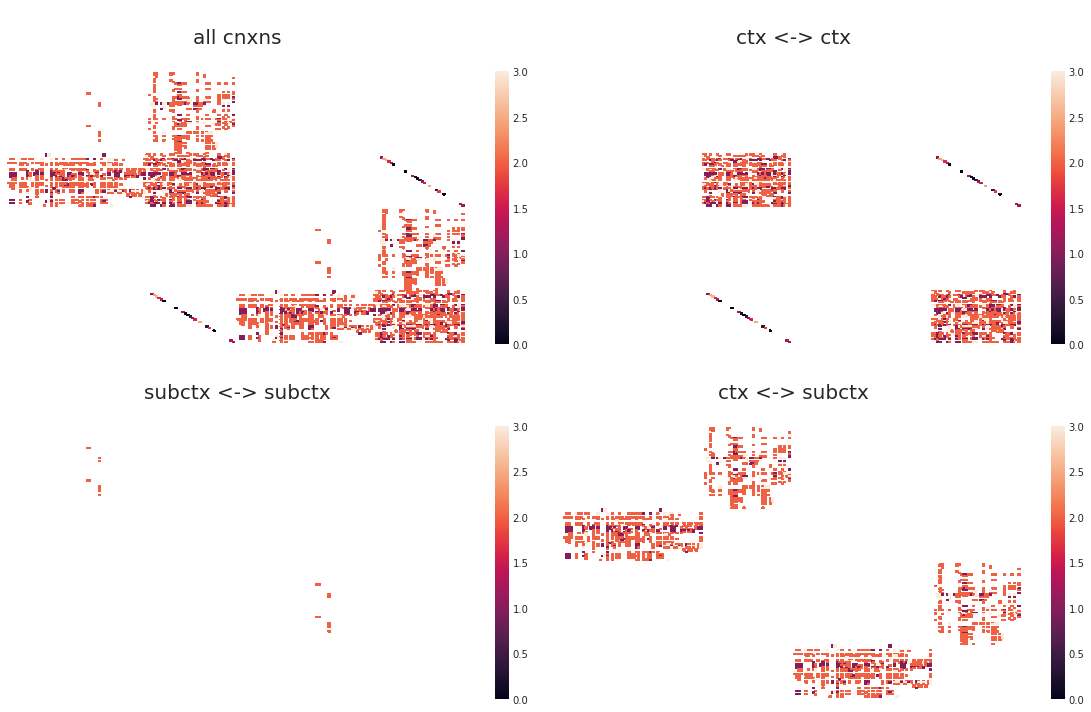

In [114]:

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(16,10))



# all connections
a = ax[0][0]
mask = conn_192.weights==0
sns.heatmap(conn_192.weights,mask=mask,ax=a,xticklabels='',yticklabels='')
a.set_title('\nall cnxns\n',fontsize=20)


# cortical-cortical cnxns
a = ax[0][1]
mask = np.zeros_like(conn_192.weights)
for c in cortical_nodes: 
    mask[c,cortical_nodes] = True
    mask[cortical_nodes,c] = True
mask = (mask*conn_192.weights!=0)==False
sns.heatmap(conn_192.weights,mask=mask,ax=a,xticklabels='',yticklabels='')
a.set_title('\nctx <-> ctx\n',fontsize=20)

# subcortico-subcortical cnxns
a = ax[1][0]
mask = np.zeros_like(conn_192.weights)
for c in subcortical_nodes: 
    mask[c,subcortical_nodes] = True
    mask[subcortical_nodes,c] = True
mask = (mask*conn_192.weights!=0)==False
sns.heatmap(conn_192.weights,mask=mask,ax=a,xticklabels='',yticklabels='')
a.set_title('\nsubctx <-> subctx\n',fontsize=20)


# cortical-subcortical cnxns
a = ax[1][1]
mask = np.zeros_like(conn_192.weights)
for c in cortical_nodes: 
    mask[c,subcortical_nodes] = True
    mask[subcortical_nodes,c] = True
mask = (mask*conn_192.weights!=0)==False
sns.heatmap(conn_192.weights,mask=mask,ax=a,xticklabels='',yticklabels='')
a.set_title('\nctx <-> subctx\n',fontsize=20)

plt.tight_layout()


Which are the few subcortical nodes that are connected to other subcortical nodes?

In [128]:
subctxsubctx_cnxns = np.nonzero(conn_192.weights[subcortical_nodes,:][:,subcortical_nodes])
sorted(conn_192.region_labels[subcortical_nodes][np.unique(subctxsubctx_cnxns)])

['lGL',
 'lMD',
 'lMDMC',
 'lPUL',
 'lPUL.I',
 'lR',
 'lVA',
 'lVAMC',
 'lVApc',
 'lVL',
 'lVLo',
 'rGL',
 'rMD',
 'rMDMC',
 'rPUL',
 'rPUL.I',
 'rR',
 'rVA',
 'rVAMC',
 'rVApc',
 'rVL',
 'rVLo']

Are there any inhibitory connections?

In [138]:
np.nonzero(conn_192.weights<0)

(array([], dtype=int64), array([], dtype=int64))

No. 

What's the reticular nucleus doing?

In [142]:
conn.region_labels[np.nonzero(conn_192.weights[conn_192.region_labels=='lR'])[1]]

array(['lPUL', 'lPUL.I', 'lCCA', 'lM1', 'lPCI', 'lPCIP', 'lPCM', 'lPCS',
       'lPMCDL', 'lPMCM', 'lV2'],
      dtype='|S7')